In [1]:
import pandas as pd

In [ ]:
googl = df[df['ticker'] == 'googl'].copy()

In [ ]:
googl[['open', 'high', 'low', 'close']] = googl[['open', 'high', 'low', 'close']]/5
googl['diffs'] = googl.close.pct_change() * 100
# drop 1 NaN value
googl = googl.dropna()

In [ ]:
googl.diffs.describe(percentiles=[0.025, 0.975])

count    8687.000000
mean        0.012902
std         1.044761
min       -13.684852
2.5%       -1.891711
50%         0.013187
97.5%       1.976242
max        17.482623
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.9% to 1.98%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

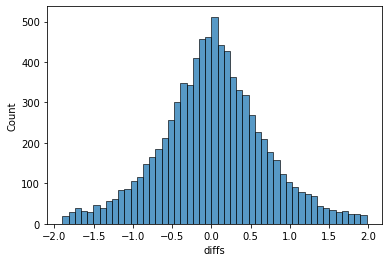

In [ ]:
diffs_no_outliers = googl[(googl['diffs']>-1.9) & (googl['diffs']<1.98)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

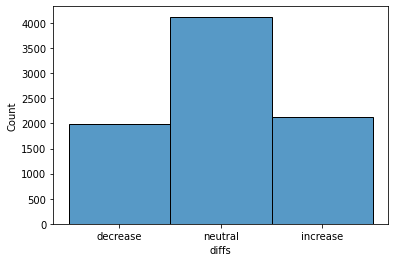

In [ ]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.40, 0.40, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [ ]:
x.value_counts(normalize=True)

neutral     0.500242
increase    0.258541
decrease    0.241216
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

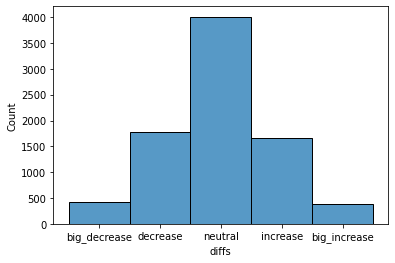

In [ ]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [ ]:
x.value_counts(normalize=True)

neutral         0.485462
decrease        0.216138
increase        0.202205
big_decrease    0.050521
big_increase    0.045675
Name: diffs, dtype: float64

In [ ]:
print(bins_5)

[-1.19725684 -0.70411374 -0.21342409  0.27726556  0.76795521  1.25864486]


In [ ]:
# how many outliers, what % of the data they are
diff_in_len = len(googl)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(googl)*100, 2))

425 4.93


In [ ]:
googl['bin_2'] = pd.cut(googl.diffs, bins=[-100, 0, 100], labels=[-1, 1])
googl['bin_3'] = pd.cut(googl.diffs, bins=bins_3, labels=[-1, 0, 1])
googl['bin_5'] = pd.cut(googl.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [ ]:
googl.to_csv('../datasets/binned/googl_binned.csv', index=False)